In [1]:
import os
import numpy as np
import mne

### Loading and Preprocessing the PhysioNet Motor Imagery Dataset
1. Set the dataset path - where the edf files are stored (edf files are the data eeg)
2. Select run - we use motor imagery runs (left hand imagery vs right hand imagery)
3. Load Edf files with mne - reads eeg signlas for each subject and run
4. Extract events - they will be out labels for classification
5. Epoching - segment the continuous eeg into short trials
6. Stroe trials and labels

In [2]:

dataset_root = "/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/PhysioNet EEG Motor Movement/eeg_motor_movement_dataset"


X_all = []
y_all = []
expected_time_len = None
runs_to_use = ['R04', 'R08', 'R12']  # Runs: motor imagery (hands vs feet)

for subject_folder in sorted(os.listdir(dataset_root)):
    subject_path = os.path.join(dataset_root, subject_folder)
    if not os.path.isdir(subject_path):
        continue

    for run in runs_to_use:
        r_file = os.path.join(subject_path, f"{subject_folder}{run}.edf")
        if not os.path.exists(r_file):
            print(f"File not found: {r_file}")
            continue

        try:
            raw = mne.io.read_raw_edf(r_file, preload=True, verbose=False)
            # raw.filter(7., 30., fir_design='firwin', verbose=False)
            # raw.set_eeg_reference('average', verbose=False)
            # ica = mne.preprocessing.ICA(verbose=False, n_components=20, max_iter = 'auto')
            # ica.fit(raw)



            events, event_id = mne.events_from_annotations(raw, verbose=False)

            if 'T1' not in event_id or 'T2' not in event_id:
                print(f"⚠️ Skipping {r_file}, missing T1/T2 events")
                continue

            selected_events = {'left': event_id['T1'], 'right': event_id['T2']}
            epochs = mne.Epochs(raw, events,event_id=selected_events, tmin=0.5, tmax=2.5,baseline=None,preload=True,verbose=False)

            X = epochs.get_data()  # shape: (n_trials, n_channels, n_times)
            y = epochs.events[:, -1] - min(epochs.events[:, -1])  # 0 for left, 1 for right

            print(f"{subject_folder}-{run}: epochs {X.shape}, labels {np.bincount(y)}")

            if expected_time_len is None:
                expected_time_len = X.shape[2]
            if X.shape[2] != expected_time_len:
                print(f"Skipping {subject_folder}-{run}, time length mismatch")
                continue

            X_all.append(X)
            y_all.append(y)

        except Exception as e:
            print(f"Error loading {r_file}: {e}")


if len(X_all) == 0:
    raise ValueError("No data loaded. Check dataset path or preprocessing.")

X_all = np.vstack(X_all)
y_all = np.hstack(y_all)

print("Data Loaded Successfully!")
print("Data shape:", X_all.shape)
print("Labels distribution:", np.bincount(y_all))

S001-R04: epochs (15, 64, 321), labels [8 7]
S001-R08: epochs (15, 64, 321), labels [8 7]
S001-R12: epochs (15, 64, 321), labels [7 8]
S002-R04: epochs (15, 64, 321), labels [7 8]
S002-R08: epochs (15, 64, 321), labels [8 7]
S002-R12: epochs (15, 64, 321), labels [8 7]
S003-R04: epochs (15, 64, 321), labels [8 7]
S003-R08: epochs (15, 64, 321), labels [7 8]
S003-R12: epochs (15, 64, 321), labels [8 7]
S004-R04: epochs (15, 64, 321), labels [8 7]
S004-R08: epochs (15, 64, 321), labels [7 8]
S004-R12: epochs (15, 64, 321), labels [8 7]
S005-R04: epochs (15, 64, 321), labels [7 8]
S005-R08: epochs (15, 64, 321), labels [7 8]
S005-R12: epochs (15, 64, 321), labels [7 8]
S006-R04: epochs (15, 64, 321), labels [8 7]
S006-R08: epochs (15, 64, 321), labels [8 7]
S006-R12: epochs (15, 64, 321), labels [8 7]
S007-R04: epochs (15, 64, 321), labels [8 7]
S007-R08: epochs (15, 64, 321), labels [8 7]
S007-R12: epochs (15, 64, 321), labels [7 8]
S008-R04: epochs (15, 64, 321), labels [7 8]
S008-R08: 

/tmp/ipykernel_220769/749507165.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(r_file, preload=True, verbose=False)
/tmp/ipykernel_220769/749507165.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(r_file, preload=True, verbose=False)
/tmp/ipykernel_220769/749507165.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(r_file, preload=True, verbose=False)


S102-R08: epochs (15, 64, 321), labels [7 8]
S102-R12: epochs (15, 64, 321), labels [8 7]
S103-R04: epochs (15, 64, 321), labels [7 8]
S103-R08: epochs (15, 64, 321), labels [8 7]
S103-R12: epochs (15, 64, 321), labels [7 8]
S104-R04: epochs (15, 64, 321), labels [7 8]
S104-R08: epochs (13, 64, 321), labels [7 6]
S104-R12: epochs (15, 64, 321), labels [8 7]
S105-R04: epochs (15, 64, 321), labels [8 7]
S105-R08: epochs (15, 64, 321), labels [7 8]
S105-R12: epochs (15, 64, 321), labels [8 7]
S106-R04: epochs (15, 64, 321), labels [8 7]
S106-R08: epochs (15, 64, 321), labels [8 7]
S106-R12: epochs (15, 64, 321), labels [8 7]
S107-R04: epochs (15, 64, 321), labels [8 7]
S107-R08: epochs (15, 64, 321), labels [8 7]
S107-R12: epochs (15, 64, 321), labels [8 7]
S108-R04: epochs (15, 64, 321), labels [7 8]
S108-R08: epochs (15, 64, 321), labels [7 8]
S108-R12: epochs (15, 64, 321), labels [8 7]
S109-R04: epochs (15, 64, 321), labels [7 8]
S109-R08: epochs (15, 64, 321), labels [8 7]
S109-R12: 

### Standardization EEG Data

Raw EEG signals can have very different ranges across channels.
To make learning stable, we *normalize* each channel by subtracting its mean and dividing by its standard deviation.

This ensures:
- All channels have values centered around *0*
- Variations are on a comparable *scale*
- The nerual network can train more effectively

In [3]:
mean = X_all.mean(axis = (0,2), keepdims = True)
std = X_all.std(axis = (0,2), keepdims = True)
X_all = (X_all - mean) / std

### Importing Deep learning dependencies and evaluations metrics

- PyTorch
- Scikit-Learn

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

### Data loading and splitting

In [5]:
# Step 3: Train-test split and DataLoader
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import numpy as np

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_all, dtype=torch.float32)
y_tensor = torch.tensor(y_all, dtype=torch.long)

# Full dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split sizes
total_size = len(dataset)
train_size = int(0.7 * total_size)   # 70% for training
val_size = int(0.15 * total_size)    # 15% for validation
test_size = total_size - train_size - val_size  # Remaining 15% for testing

# Split datasets
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

# ---- NEW: Save test set for later use ----
X_test = torch.stack([x for x, _ in test_set])
y_test = torch.tensor([y.item() for _, y in test_set])

save_path = "/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/PhysioNet EEG Motor Movement/"

np.save(save_path + "X_test.npy", X_test.numpy())
np.save(save_path + "y_test.npy", y_test.numpy())

print("✅ Test set saved at:", save_path)


✅ Test set saved at: /media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/PhysioNet EEG Motor Movement/


### Defining model

CNN + LSTM

In [6]:
class CNN_LSTM(nn.Module):
    def __init__(self, n_channels, n_classes, seq_len,
                 conv1_filters=16, conv2_filters=128,
                 lstm_hidden=256, dropout_cnn=0.15, dropout_fc=0.2):
        super(CNN_LSTM, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv1d(n_channels, conv1_filters, kernel_size=3, padding=1),
            nn.BatchNorm1d(conv1_filters),
            nn.ReLU(),
            nn.Dropout(dropout_cnn),
            nn.Conv1d(conv1_filters, conv2_filters, kernel_size=3, padding=1),
            nn.BatchNorm1d(conv2_filters),
            nn.ReLU(),
            nn.Dropout(dropout_cnn)
        )

        self.lstm = nn.LSTM(
            input_size=conv2_filters,
            hidden_size=lstm_hidden,
            num_layers=1,
            bidirectional=False,
            batch_first=True
        )

        self.classifier = nn.Sequential(
            nn.Linear(lstm_hidden , 16),
            nn.ReLU(),
            nn.Dropout(dropout_fc),
            nn.Linear(16, n_classes)
        )

    def forward(self, x):
        x = self.cnn(x)               # (batch, conv2_filters, seq_len)
        x = x.permute(0, 2, 1)        # (batch, seq_len, features)
        lstm_out, _ = self.lstm(x)    # (batch, seq_len, hidden*2)
        x = torch.mean(lstm_out, dim=1)  # Mean pooling
        return self.classifier(x)


In [7]:

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [8]:
print(device)

cuda:0


#### Model setup

we will create an instance of our CNN-LSTM model

In [9]:
# Step 6: Model setup
n_channels = X_all.shape[1]
seq_len = X_all.shape[2]
n_classes = len(np.unique(y_all))  # correct for classification

model = CNN_LSTM(
    n_channels=n_channels,
    n_classes=n_classes,
    seq_len=seq_len
).to(device)


### Model HyperParameters:

- loss function (crossentropyloss) - handles class imbalance by giving more weight to underrepresented classes.
- optimizer
- scheduler (reduces the learning rate if validation accuracy stops improving, helping the model to converge better)

In [10]:
# Step 7: Weighted Loss, Optimizer, Scheduler
class_weights = compute_class_weight('balanced', classes=np.unique(y_all), y=y_all)
weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=weights_tensor)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, factor=0.5)


### Training, Validation and Testing functions


In [11]:
### Step 8: Training, Validation, and Testing Functions
def train_epoch():
    model.train()
    running_loss, correct, total = 0, 0, 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * y_batch.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

    return running_loss / total, correct / total

def validate():
    model.eval()
    correct, total = 0, 0
    running_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item() * y_batch.size(0)

            _, preds = torch.max(outputs, 1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

    val_loss = running_loss / total
    val_acc = correct / total
    return val_loss, val_acc


def test_model():
    model.eval()
    correct, total = 0, 0
    running_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)  # Optional: track test loss
            running_loss += loss.item() * y_batch.size(0)

            _, preds = torch.max(outputs, 1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

    test_loss = running_loss / total
    test_acc = correct / total
    return test_loss, test_acc

### Training loop, Early Stopping, Performance Plots

- run train_epoch function and validate
- track loss and accuracy
- use scheduler to reduce learning rate when validation accuracy stops improving
- save the best model checkpoint (best_model.pth) when validation accuracy improves.
- apply early stopping if performance dooesn't improve for 30 consecutive epochs

Epoch 01 | Train Loss: 0.6803 | Val Loss: 0.6595 | Train Acc: 0.5520 | Val Acc: 0.5734
Epoch 02 | Train Loss: 0.6564 | Val Loss: 0.6156 | Train Acc: 0.5927 | Val Acc: 0.6336
Epoch 03 | Train Loss: 0.6126 | Val Loss: 0.5718 | Train Acc: 0.6410 | Val Acc: 0.6895
Epoch 04 | Train Loss: 0.6409 | Val Loss: 0.5869 | Train Acc: 0.6476 | Val Acc: 0.7231
Epoch 05 | Train Loss: 0.6059 | Val Loss: 0.5996 | Train Acc: 0.6806 | Val Acc: 0.7035
Epoch 06 | Train Loss: 0.6004 | Val Loss: 0.6167 | Train Acc: 0.6791 | Val Acc: 0.6308
Epoch 07 | Train Loss: 0.5918 | Val Loss: 0.5498 | Train Acc: 0.6776 | Val Acc: 0.6895
Epoch 08 | Train Loss: 0.5885 | Val Loss: 0.5786 | Train Acc: 0.6587 | Val Acc: 0.6434
Epoch 09 | Train Loss: 0.5613 | Val Loss: 0.5244 | Train Acc: 0.6823 | Val Acc: 0.7483
Epoch 10 | Train Loss: 0.5426 | Val Loss: 0.5215 | Train Acc: 0.7165 | Val Acc: 0.7455
Epoch 11 | Train Loss: 0.5333 | Val Loss: 0.5131 | Train Acc: 0.7228 | Val Acc: 0.7315
Epoch 12 | Train Loss: 0.5285 | Val Loss: 0

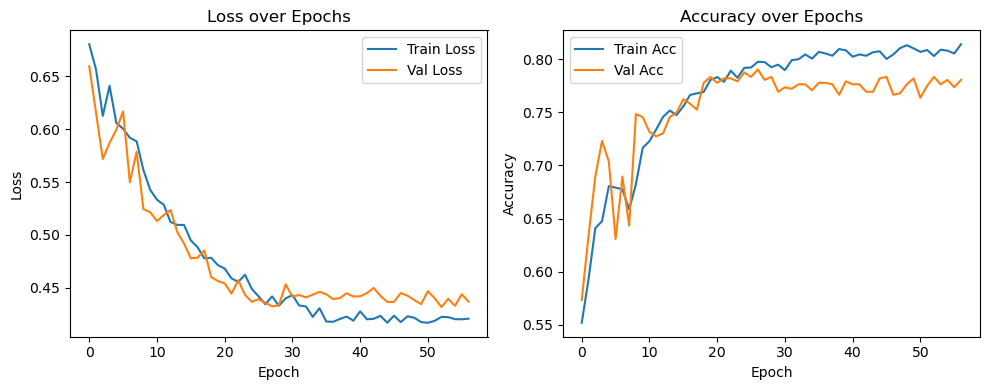

In [12]:
# Step 9: Training Loop, Early Stopping, and Performance Plots
import matplotlib.pyplot as plt
best_model_path ="/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/PhysioNet EEG Motor Movement"
epochs = 100
best_val = 0
patience = 30
patience_counter = 0

# Lists to store metrics
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(1, epochs + 1):
    train_loss, train_acc = train_epoch()
    val_loss, val_acc = validate()
    scheduler.step(val_acc)  # Adjust LR

    # Save metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} | "
          f"Val Loss: {val_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    if val_acc > best_val:
        best_val = val_acc
        patience_counter = 0
        torch.save(model.state_dict(), best_model_path +"/best_model_cock.pth")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Plot Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.tight_layout()
plt.show()


#### Plot losses and Accuracy curves

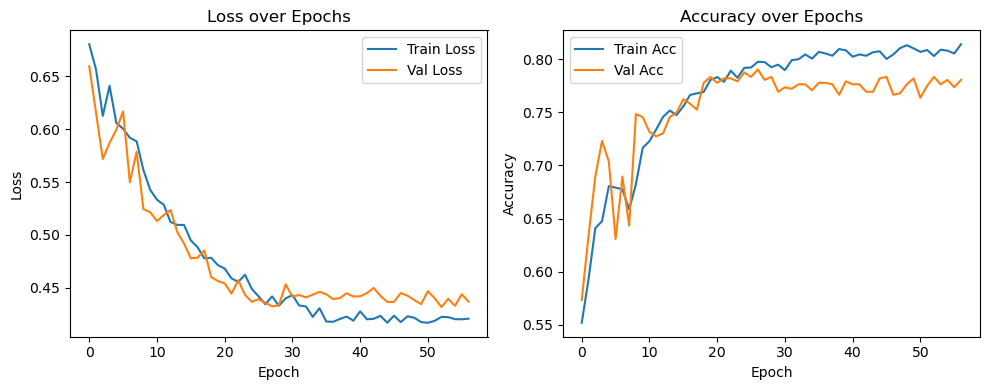

In [13]:
# Plot Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.tight_layout()
plt.show()

### model eval on validation set

In [14]:
# Step 10: Evaluate on Validation Set and Print Confusion Matrix
model.load_state_dict(torch.load(best_model_path +"/big_black_model.pth"))
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        _, predicted = outputs.max(1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(predicted.cpu().numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       370
           1       0.72      0.65      0.68       345

    accuracy                           0.71       715
   macro avg       0.71      0.70      0.70       715
weighted avg       0.71      0.71      0.71       715


Confusion Matrix:
[[282  88]
 [122 223]]


### Hyperparameter Optimization with Optuna

In [ ]:
import optuna
from optuna.samplers import TPESampler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import os
import numpy as np

log_file = "optuna_trials_log.csv"

N_EPOCHS = 100
N_TRIALS = 150
N_SPLITS = 3
PATIENCE = 7

def objective(trial):
    # ---- Hyperparameter search space ----
    conv1_filters = trial.suggest_categorical("conv1_filters", [8, 16, 32, 64, 128,256])
    conv2_filters = trial.suggest_categorical("conv2_filters", [16, 32, 64, 128, 256,512])
    lstm_hidden   = trial.suggest_categorical("lstm_hidden", [32, 64, 128, 256, 512,1024])
    dropout_cnn   = trial.suggest_float("dropout_cnn", 0.05, 0.7, step=0.05)
    dropout_fc    = trial.suggest_float("dropout_fc", 0.05, 0.5, step=0.05)
    learning_rate = trial.suggest_float("lr", 1e-5, 5e-2, log=True)
    batch_size    = trial.suggest_categorical("batch_size", [16, 32, 64, 128])
    optimizer_type = trial.suggest_categorical("optimizer", ["Adam", "AdamW", "RMSprop", "SGD","Adadelta"])

    # ---- Cross-validation ----
    kf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    acc_scores = []

    for train_idx, val_idx in kf.split(X_all, y_all):
        X_train, X_val = X_all[train_idx], X_all[val_idx]
        y_train, y_val = y_all[train_idx], y_all[val_idx]

        X_train = torch.tensor(X_train, dtype=torch.float32)
        y_train = torch.tensor(y_train, dtype=torch.long)
        X_val   = torch.tensor(X_val, dtype=torch.float32)
        y_val   = torch.tensor(y_val, dtype=torch.long)

        train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
        val_loader   = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size)

        # ---- Model ----
        model = CNN_LSTM(
            n_channels=n_channels,
            n_classes=n_classes,
            seq_len=seq_len,
            conv1_filters=conv1_filters,
            conv2_filters=conv2_filters,
            lstm_hidden=lstm_hidden,
            dropout_cnn=dropout_cnn,
            dropout_fc=dropout_fc
        ).to(device)

        # ---- Optimizer ----
        if optimizer_type == "Adam":
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        elif optimizer_type == "AdamW":
            optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
        elif optimizer_type == "RMSprop":
            optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
        else:
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

        criterion = nn.CrossEntropyLoss(weight=weights_tensor)

        # ---- Training loop ----
        best_val_acc = 0
        patience_counter = 0

        for epoch in range(N_EPOCHS):
            model.train()
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()

            # ---- Validation ----
            model.eval()
            correct, total = 0, 0
            with torch.no_grad():
                for X_batch, y_batch in val_loader:
                    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                    preds = model(X_batch).argmax(dim=1)
                    correct += (preds == y_batch).sum().item()
                    total += y_batch.size(0)

            val_acc = correct / total
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                patience_counter = 0
            else:
                patience_counter += 1

            # ---- Early stopping ----
            if patience_counter >= PATIENCE:
                break

        acc_scores.append(best_val_acc)

    # ---- Average CV accuracy ----
    avg_acc = np.mean(acc_scores)
    trial.report(avg_acc, 0)

    # ---- Save results to CSV ----
    trial_result = {"trial_number": trial.number, "accuracy": avg_acc}
    trial_result.update(trial.params)
    df = pd.DataFrame([trial_result])
    if not os.path.exists(log_file):
        df.to_csv(log_file, index=False)
    else:
        df.to_csv(log_file, mode="a", index=False, header=False)

    return avg_acc

study = optuna.create_study(direction = "maximize", sampler = TPESampler(n_startup_trials=40, multivariate=True))
study.optimize(objective, n_trials = N_TRIALS)

print("\nBest trial:")
print(f"  Accuracy: {study.best_trial.value:.4f}")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

In [ ]:
print('hi')